In [1]:
import pandas as pd

girat = pd.read_csv("data-cleaned/Gini Ratio.csv")

girat.head()

Province  Urban_Semester1  Urban_Semester2  Rural_Semester1  \
0     ACEH         0.344562         0.358692         0.272625   
1     ACEH         0.344562         0.358692         0.272625   
2     ACEH         0.344562         0.358692         0.272625   
3     ACEH         0.291000         0.358692         0.250000   
4     ACEH         0.312000         0.358692         0.261000   

   UrbanRural_Semester1  UrbanRural_Semester2  Year  
0              0.318062              0.323846  2005  
1              0.318062              0.323846  2007  
2              0.318062              0.323846  2008  
3              0.288000              0.323846  2009  
4              0.301000              0.323846  2010

/var/folders/kq/w5c98xxj7p38m5c0p6grpfq00000gn/T/ipykernel_65968/896186343.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.97])


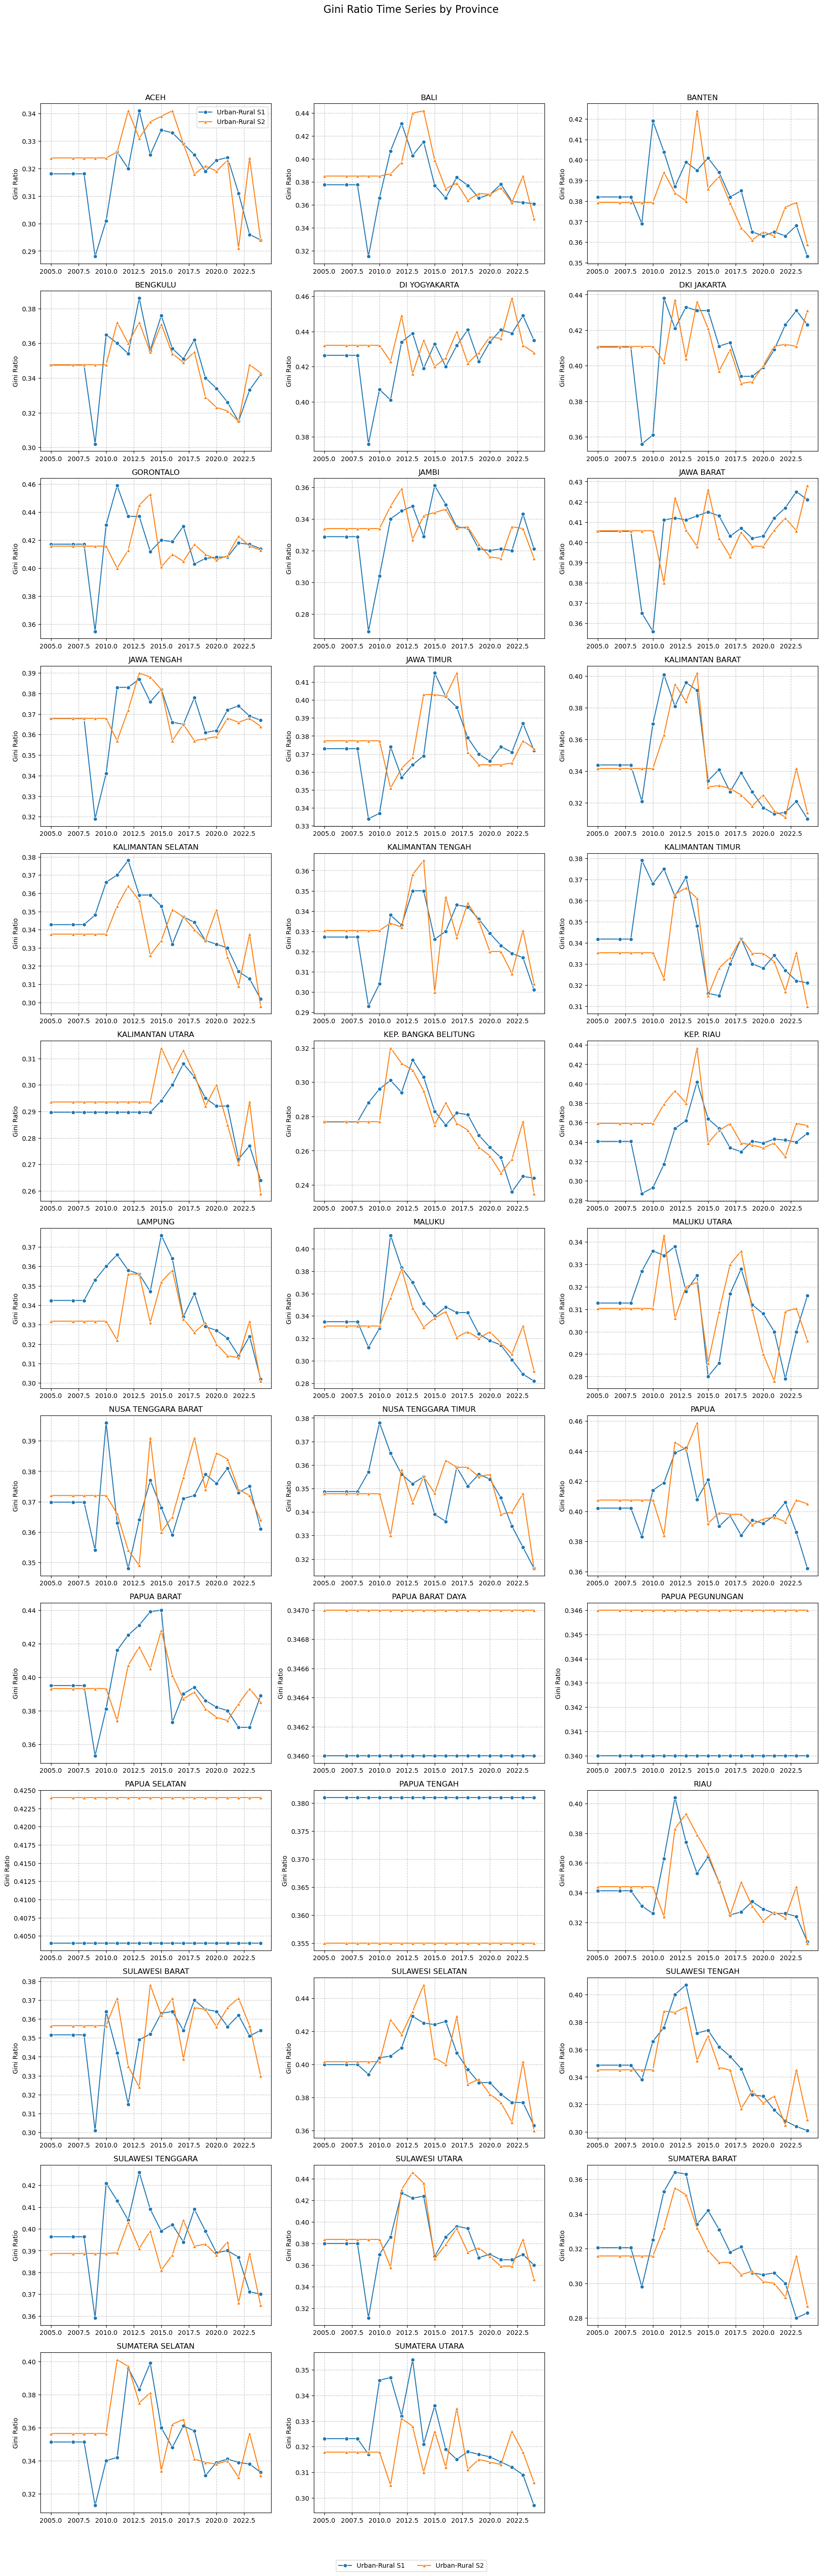

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter out 'INDONESIA' from the dataframe
girat_filtered = girat[girat['Province'] != 'INDONESIA']

# Get unique provinces for plotting
provinces = sorted(girat_filtered['Province'].unique())

# Set up the figure with appropriate size
fig, axes = plt.subplots(nrows=len(provinces)//3 + (1 if len(provinces)%3 > 0 else 0), 
                         ncols=3, figsize=(18, len(provinces)*1.5), 
                         constrained_layout=True)
axes = axes.flatten()

# Loop through provinces and create a time series plot for each
for i, province in enumerate(provinces):
    province_data = girat_filtered[girat_filtered['Province'] == province]
    
    # Plot the data for this province
    ax = sns.lineplot(data=province_data, x='Year', y='UrbanRural_Semester1', 
                     marker='o', label='Urban-Rural S1', ax=axes[i])
    sns.lineplot(data=province_data, x='Year', y='UrbanRural_Semester2', 
                marker='^', label='Urban-Rural S2', ax=axes[i])
    
    axes[i].set_title(province)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Gini Ratio')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Only include legend for the first plot to save space
    if i > 0:
        axes[i].get_legend().remove()

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Add a common legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
           ncol=2, frameon=True)

plt.suptitle('Gini Ratio Time Series by Province', fontsize=16, y=0.995)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.show()

/var/folders/kq/w5c98xxj7p38m5c0p6grpfq00000gn/T/ipykernel_65968/669232140.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.97])


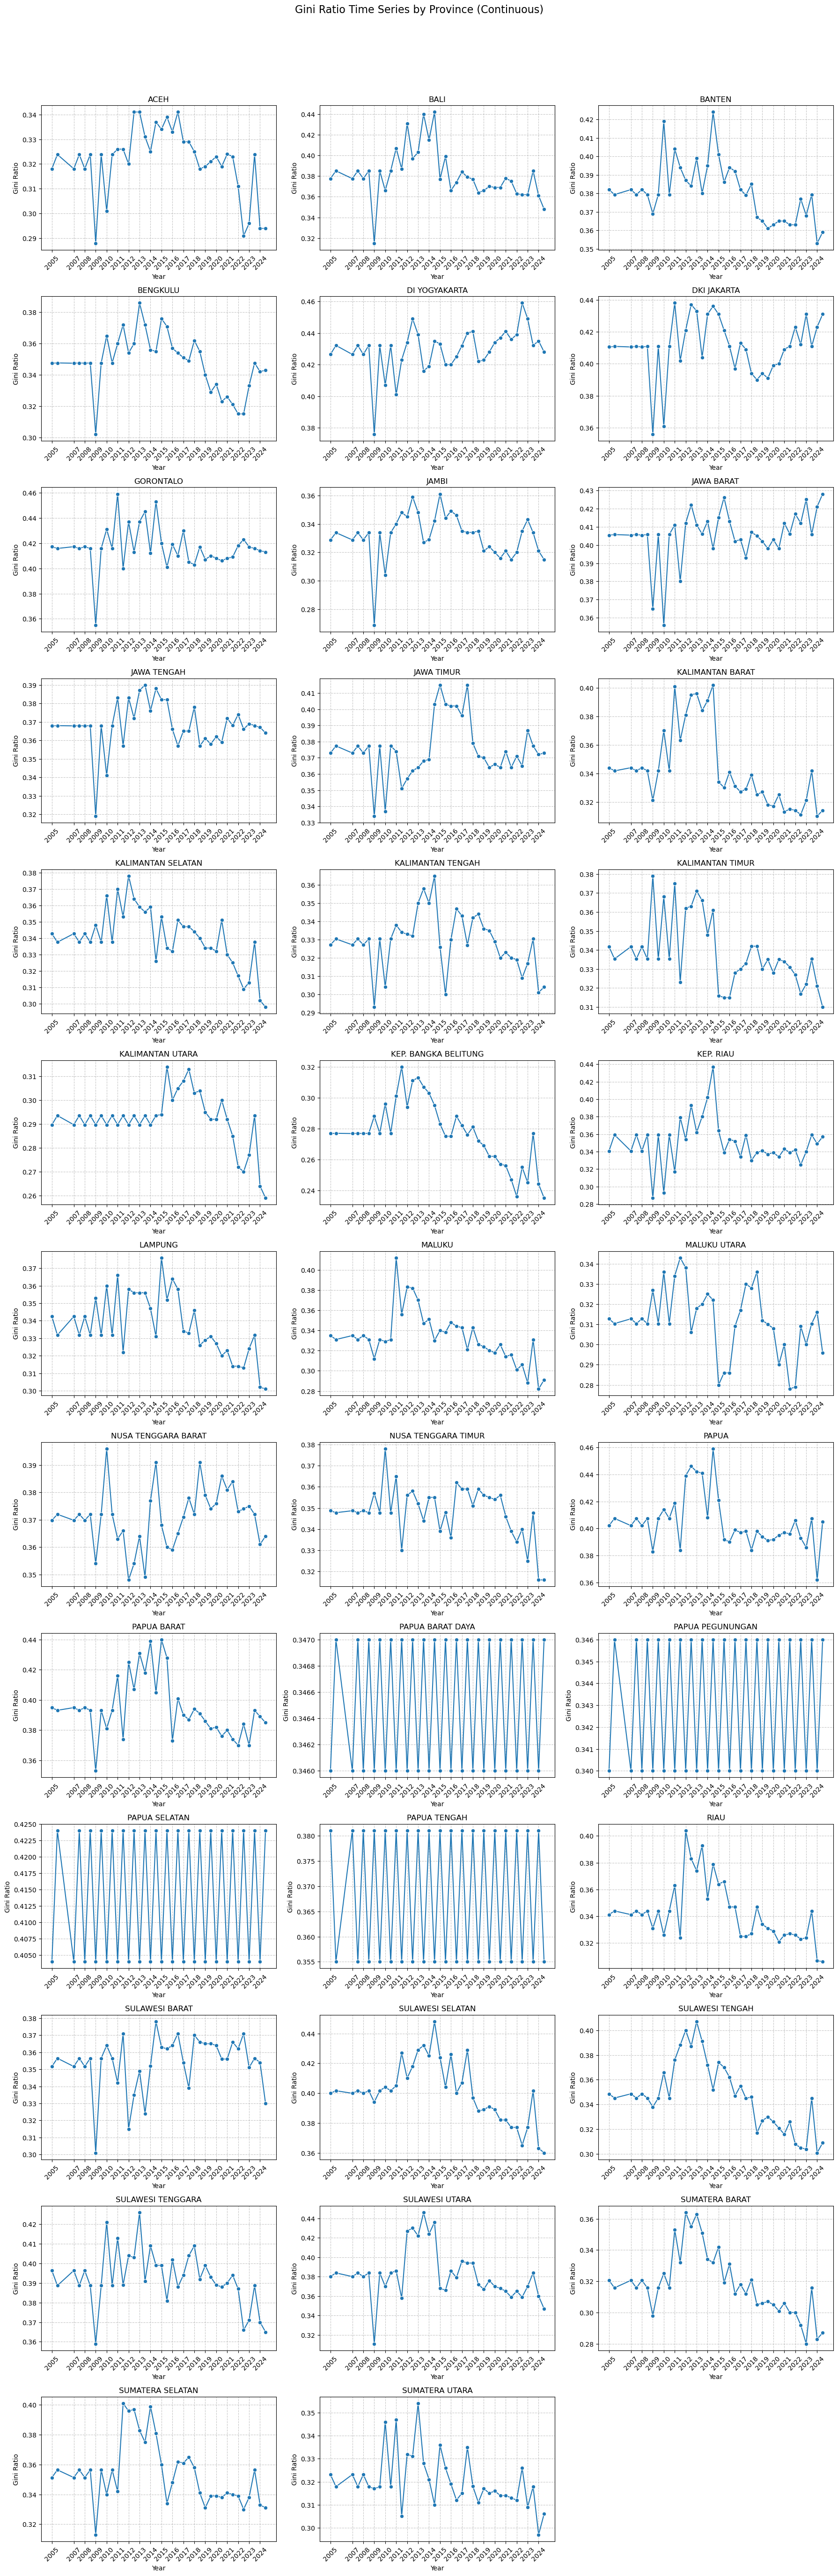

In [4]:
# Create a new figure
fig, axes = plt.subplots(nrows=len(provinces)//3 + (1 if len(provinces)%3 > 0 else 0), 
                         ncols=3, figsize=(18, len(provinces)*1.5), 
                         constrained_layout=True)
axes = axes.flatten()

# Loop through provinces and create a time series plot for each
for i, province in enumerate(provinces):
    province_data = girat_filtered[girat_filtered['Province'] == province]
    
    # Create a new dataframe with semester data in sequence (as a continuous timeline)
    time_series_data = []
    
    for _, row in province_data.iterrows():
        year = row['Year']
        # Add Semester 1 data point
        time_series_data.append({
            'Year_Semester': year + 0.0,  # First semester
            'Value': row['UrbanRural_Semester1'],
        })
        # Add Semester 2 data point
        time_series_data.append({
            'Year_Semester': year + 0.5,  # Second semester
            'Value': row['UrbanRural_Semester2'],
        })
    
    time_df = pd.DataFrame(time_series_data)
    time_df = time_df.sort_values('Year_Semester')
    
    # Plot the data for this province as a single continuous line
    sns.lineplot(data=time_df, x='Year_Semester', y='Value', 
                 marker='o', ax=axes[i])
    
    # Set x-ticks to show only years (not the semester decimals)
    unique_years = sorted(province_data['Year'].unique())
    axes[i].set_xticks(unique_years)
    axes[i].set_xticklabels(unique_years, rotation=45)
    
    axes[i].set_title(province)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Gini Ratio')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Gini Ratio Time Series by Province (Continuous)', fontsize=16, y=0.995)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.show()


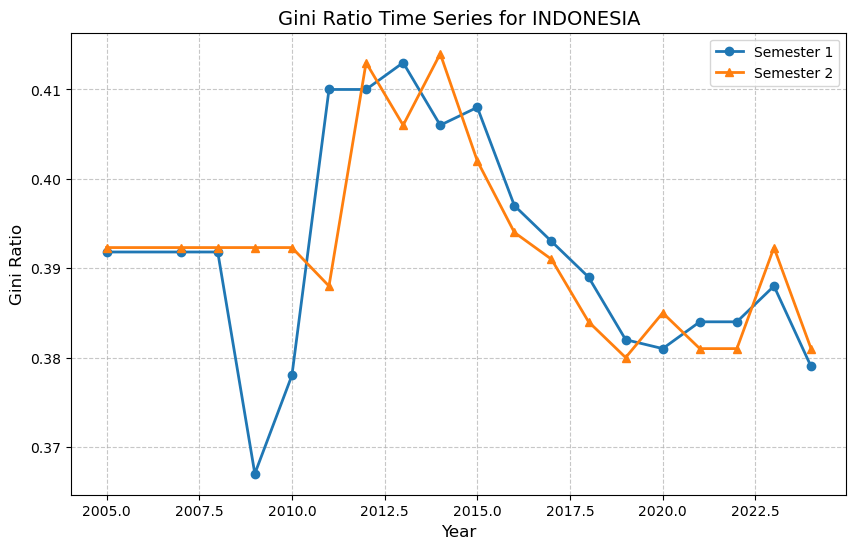

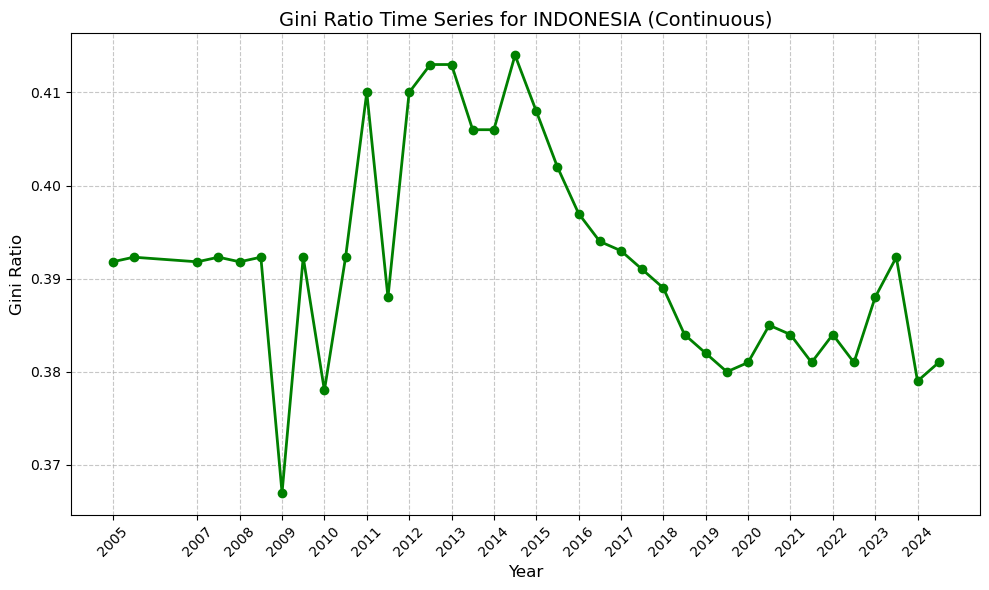

In [5]:
# Create a plot for Indonesia data
indonesia_data = girat[girat['Province'] == 'INDONESIA']

plt.figure(figsize=(10, 6))

# Plot both semesters
plt.plot(indonesia_data['Year'], indonesia_data['UrbanRural_Semester1'], 
         marker='o', label='Semester 1', linewidth=2)
plt.plot(indonesia_data['Year'], indonesia_data['UrbanRural_Semester2'], 
         marker='^', label='Semester 2', linewidth=2)

# Add title and labels
plt.title('Gini Ratio Time Series for INDONESIA', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gini Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Create a continuous timeline visualization as well
plt.figure(figsize=(10, 6))

# Create a continuous timeline for Indonesia
time_series_data = []
for _, row in indonesia_data.iterrows():
    year = row['Year']
    time_series_data.append({
        'Year_Semester': year + 0.0,  # First semester
        'Value': row['UrbanRural_Semester1'],
    })
    time_series_data.append({
        'Year_Semester': year + 0.5,  # Second semester
        'Value': row['UrbanRural_Semester2'],
    })

time_df = pd.DataFrame(time_series_data)
time_df = time_df.sort_values('Year_Semester')

# Plot the continuous timeline
plt.plot(time_df['Year_Semester'], time_df['Value'], 
         marker='o', linewidth=2, color='green')

# Set x-ticks to show only years
unique_years = sorted(indonesia_data['Year'].unique())
plt.xticks(unique_years, unique_years, rotation=45)
plt.title('Gini Ratio Time Series for INDONESIA (Continuous)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gini Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()